In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

In [36]:
#Reading input data

data = pd.read_csv('pred/final-noshift.csv')

| AQI Band | Low Breakpoint | High Breakpoint |
| :--------------: | :----------------: | :-----------------: |
| LOW | 0 | 35.9 |
| MODERATE | 36 | 53.9 |
| HIGH | 54 | 70.9 |
| VERY HIGH |71 | 102 |

In [47]:
##### Classifying AQI based on PM2.5 values
data['BAND'] = pd.cut(data['PM25'],[-1,11.9,23.9,35.9,41.9,47.9,53.9,58.9,64.9,70.9,102],labels=[1,2,3,4,5,6,7,8,9,10])

In [48]:
#Classification model
y = data['BAND'].astype('int64')
X = data.drop(['BAND'], axis=1)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [50]:
#Multiclass NN Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create MLPClassifier object
mlp = MLPClassifier(activation='logistic', random_state=1234)

In [51]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
# Score the model
multiclass_neural_network_score = mlp.score(X_test, y_test)
multiclass_neural_network_score

0.9757531227038942

In [53]:
# Make predictions using the testing set
mnn_pred = mlp.predict(X_test)

In [54]:
# Calculate probabilities
mnn_prob = mlp.predict_proba(X_test)

In [55]:
# Calculate confusion matrix
confusion_mnn = confusion_matrix(y_test,mnn_pred)

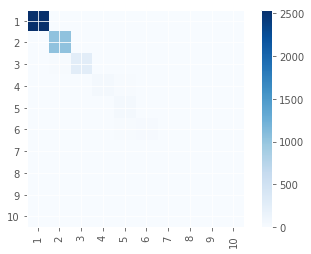

In [56]:
columns = ['1','2','3','4','5','6','7','8','9','10']

plt.imshow(confusion_mnn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,7,8,9], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,7,8,9], columns)
plt.colorbar()

plt.show()